# Homework 3
### Camilo Gómez - C.C. 1010088965
Realize numerically gradient descent method on the "data.csv"
which represent some linear regression problem (fitting)  

Use following parameters:

    theta_1 = 10     # initial values of   
    theta_0 = 10     # y=theta_1*x + theta_0  
    alpha = 0.0001   # The learning Rate  
    epochs = 100     # The number of iterations  
    
After finding the optimal $\theta_0$ and $\theta_1$ that minimized the MSE function make four plots (on an array... using plt.subplots(2,2))

* plot 1 the final fitting line to the data and compare it with the scipy.optimize (lm) build-in function
* plot 2 time evolution of MSE vs number of iterations
* plot 3 time evolution of MAE vs number of iterations
* plot 4 time evolution of MAPE vs number of iterations



to store results of for example MAPE, you can   
create empty list: MAPE=[]  
then inside a loop: MAPE.append(calculated mape)

* play with $\alpha$ to see how the learning rate affects the optimization 
* intenta alpha=0.0007

## Solution

First, we load the data:

In [1]:
import numpy as np

In [2]:
arr = np.loadtxt("data.csv", delimiter=",")
m = len(arr)
X = arr[:,0]
y = arr[:,1]

Now we define initial parameters:

In [3]:
theta_1 = 10     # initial values of   
theta_0 = 10     # y=theta_1*x + theta_0  
alpha = 0.0001   # The learning Rate  
epochs = 100     # The number of iterations  

Next we calculate the hypothesis, the derivatives, and we update the thetas in an iterative loop. In this loop, the errors are also accumulated:

In [4]:
MSEs = []
MAEs = []
MAPEs = []


for epoch in range(epochs):
    # First, update of thetas
    hx = theta_1 * X + theta_0
    dtheta_0 = - (1 / m) * np.sum(y - hx)
    dtheta_1 = - (1 / m) * np.sum((y - hx) * X)
    theta_0 = theta_0 - alpha * dtheta_0
    theta_1 = theta_1 - alpha * dtheta_1

    # Then, accumulation of errors
    MSEs.append((1 / m) * np.sum((y - hx)**2))
    MAEs.append((1 / m) * np.sum(abs(y - hx)))
    MAPEs.append((1 / m) * np.sum(abs((y - hx) / y)))

Lets's draw the result of the fit, with the errors over epochs:

In [5]:
import matplotlib.pyplot as plt

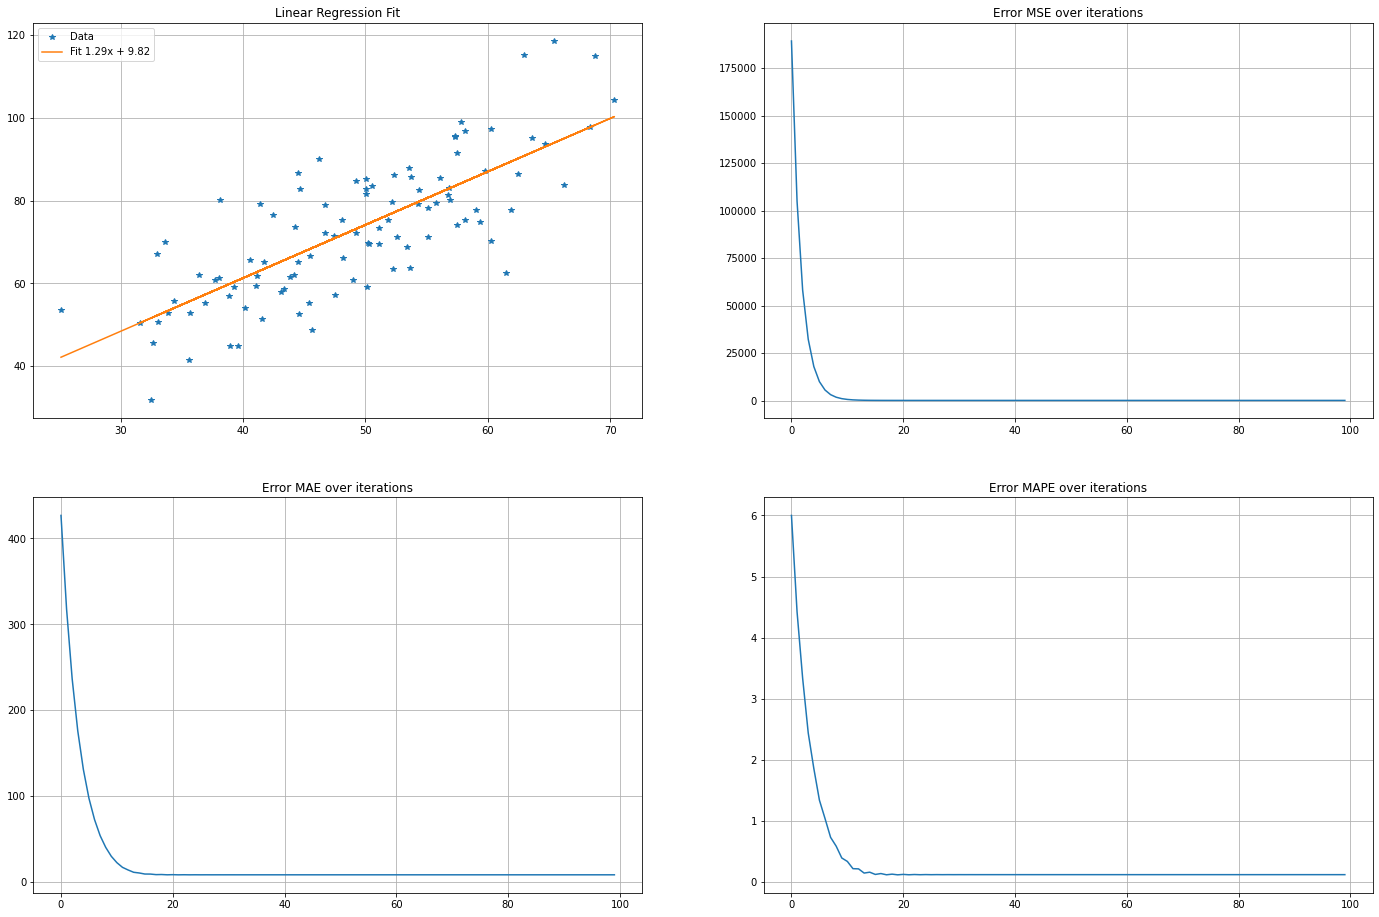

In [15]:
plt.figure(figsize=(24,16))

plt.subplot(221)
plt.plot(X, y, "*", label="Data")
plt.plot(X, theta_1*X + theta_0, label="Fit {:.2f}x + {:.2f}".format(theta_1, theta_0))
plt.legend()
plt.grid()
plt.title("Linear Regression Fit")

plt.subplot(222)
plt.plot(MSEs)
plt.grid()
plt.title("Error MSE over iterations")

plt.subplot(223)
plt.plot(MAEs)
plt.grid()
plt.title("Error MAE over iterations")

plt.subplot(224)
plt.plot(MAPEs)
plt.grid()
plt.title("Error MAPE over iterations")

plt.show()

As we can see, it's a really good fit to the data, proving the method works. Of course, it's noticeable that the data is not linear so using a linear fit wouldn't be physically correct, but we're only trying to study the process of training a linear regression withouth the physicial implications, and in that regard it's working perfectly.

Also, the loss functions are decreasing over time, almost approaching zero. This is the expected behaviour, because the coefficients are getting more accurate with each iteration.

Now the learning rate is going to be changed to 0.0007 to see what happens:

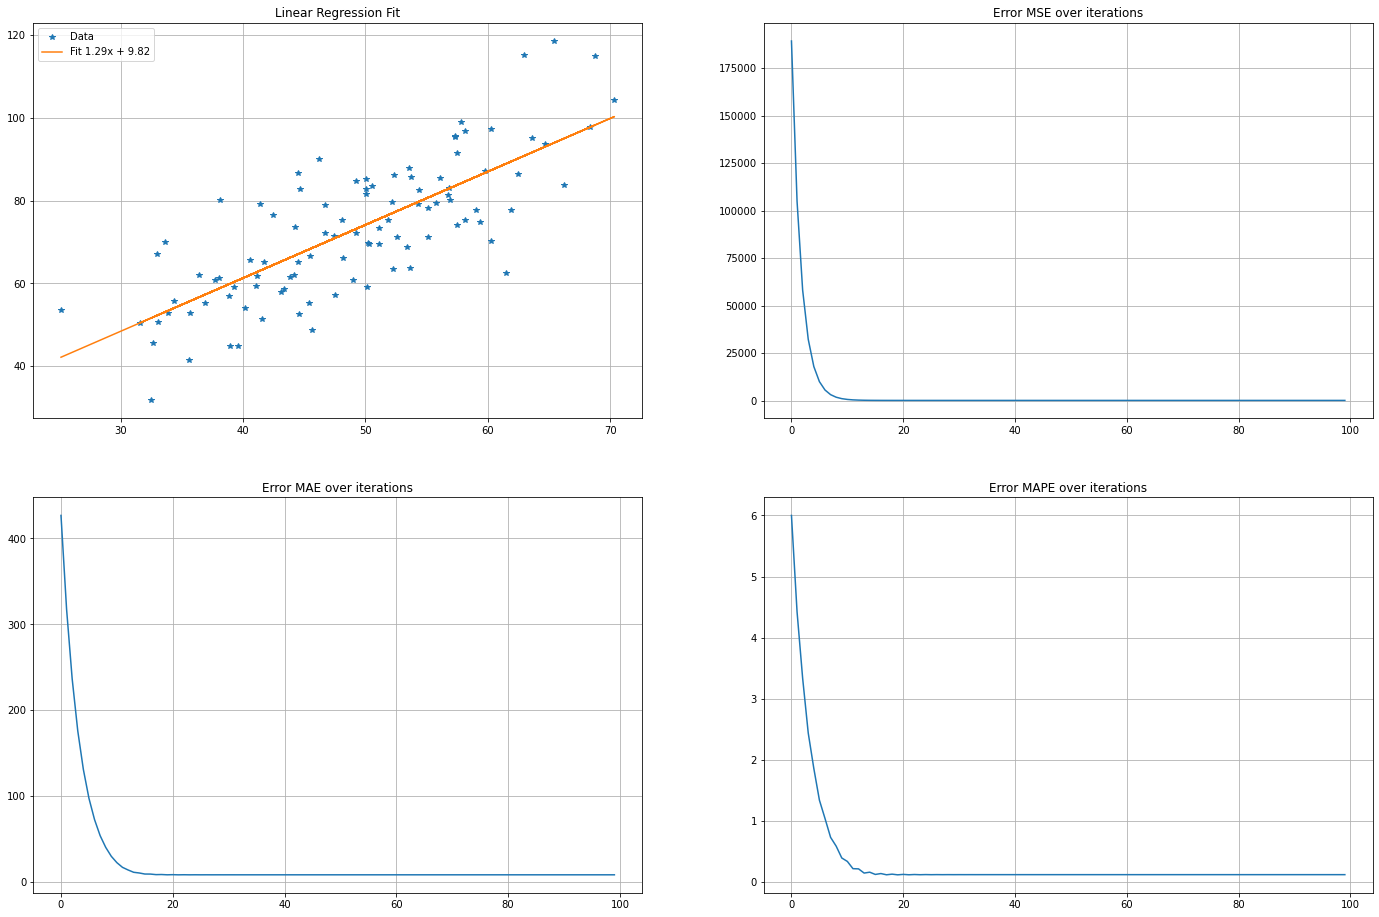

In [16]:
theta_1 = 10     # initial values of   
theta_0 = 10     # y=theta_1*x + theta_0  
alpha = 0.0007   # The learning Rate  
epochs = 100     # The number of iterations  

MSEs = []
MAEs = []
MAPEs = []


for epoch in range(epochs):
    # First, update of thetas
    hx = theta_1 * X + theta_0
    dtheta_0 = - (1 / m) * np.sum(y - hx)
    dtheta_1 = - (1 / m) * np.sum((y - hx) * X)
    theta_0 = theta_0 - alpha * dtheta_0
    theta_1 = theta_1 - alpha * dtheta_1

    # Then, accumulation of errors
    MSEs.append((1 / m) * np.sum((y - hx)**2))
    MAEs.append((1 / m) * np.sum(abs(y - hx)))
    MAPEs.append((1 / m) * np.sum(abs((y - hx) / y)))

plt.figure(figsize=(24,16))

plt.subplot(221)
plt.plot(X, y, "*", label="Data")
plt.plot(X, theta_1*X + theta_0, label="Fit {:.2f}x + {:.2f}".format(theta_1, theta_0))
plt.legend()
plt.grid()
plt.title("Linear Regression Fit")

plt.subplot(222)
plt.plot(MSEs)
plt.grid()
plt.title("Error MSE over iterations")

plt.subplot(223)
plt.plot(MAEs)
plt.grid()
plt.title("Error MAE over iterations")

plt.subplot(224)
plt.plot(MAPEs)
plt.grid()
plt.title("Error MAPE over iterations")

plt.show()

It seems that changing the alpha to 0.0007 still produces a good fit. That makes sense because it still is a low enough value for the gradient not to explode, althogh we can see that the MAPE oscillates a bit more which means that this alpha is a bit more unstable for finding a minimum of the loss function, but it still gets there.